In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import yfinance as yf
from processing.downloader import DataDownloader

sns.set_style("whitegrid")

# 1. Inflation

**Hypothesis**: Some assets are better than others at protecting against inflation, i.e. they have a higher correlation with inflation.
Those assets could be: **TIPS, Gold, Real Estate, Oil, Stocks, Bonds, etc.**
We analyze the relationship between inflation and the assets mentioned above and create a portfolio that is optimized for inflation protection.


In [2]:
# Add the path to which you downloaded the data with the script
# Starting from the root of the git repo.
# For instance, if the repo had the structure
# .
# ├── .git
# ├── LICENSE
# ├── README.md
# ├── code
# ├── data                       < ---------- And you downloaded the data here
# │   └── prices.db
# ├── paper
# │   ├── paper.tex
# │   └── presentation.tex
# ├── pyproject.toml
# ├── requirements-dev.txt
# └── requirements.txt
#
# Set BASE_PATH = 'data'

BASE_PATH = 'data'
assert BASE_PATH != '<DATA_FOLDER>', "Don't forget to place the folder to which you downloaded the data, instead of placeholder"

Now we load and prepare financial data:

In [3]:
import os.path

BASE_PATH = f'../../{BASE_PATH}'
db_file_name = 'prices.db'
db_file_path = os.path.join(BASE_PATH, db_file_name)
assert os.path.exists(db_file_path), f"The file {db_file_name} does not exist in {BASE_PATH}."

We ensure the database file exists, load the data for various asset classes, sort the columns, and handle potential missing values by replacing zeros with **NaN**.

In [4]:
if __name__ == "__main__":
    data_dwder = DataDownloader(
        lst_tickers=[
            {
                "yahoo": "XHB"
            },  # Median Sale Price of Houses Sold in the United States
            {
                "fred": "CPIAUCSL"
            },  # Consumer Price Index for All Urban Consumers
            {
                "fred": "DCOILWTICO"
            },  # Crude Oil Prices: West Texas Intermediate (WTI)
            {"yahoo": "^GSPC"},  # S&P 500 Index
            {"yahoo": "GC=F"},  # Gold Futures
            {"fred": "GS10"},  # 10-Year Treasury Constant Maturity Rate
            {"fred": "GS30"},  # 30-Year Treasury Constant Maturity Rate
            {"yahoo": "VNQ"},  # REITs (Vanguard Real Estate ETF)
            {
                "yahoo": "DBC"
            },  # Commodities (Invesco DB Commodity Index Tracking Fund)
            {"yahoo": "FXE"},  # Foreign Currencies (CurrencyShares Euro Trust)
            {"yahoo": "BTC-USD"},  # Cryptocurrencies (Bitcoin)
            {
                "yahoo": "IGF"
            },  # Infrastructure Funds (iShares Global Infrastructure ETF)
            {"yahoo": "XLE"},  # Energy Stocks (Energy Select Sector SPDR Fund)
        ],
        concurrency=1,
        save=False,
        base_path=BASE_PATH,
    )
    data = data_dwder.load_data()

data

2023-12-19 01:35:57,070 - DataDownloader - INFO - Folder for data already exists: ../../data


ticker,BTC-USD,CPIAUCSL,DBC,DCOILWTICO,FXE,GC=F,GS10,GS30,IGF,VNQ,XHB,XLE,^GSPC
date,,,,,,,,,,,,,
1970-01-01,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,0.000000
1970-01-03,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,0.000000
1970-01-04,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,0.000000
1970-01-05,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,37454.191406,NaN,23.940001,74.46,100.989998,2011.699951,NaN,NaN,45.630001,79.800003,82.129997,84.489998,4554.859863
2023-11-28,37247.992188,NaN,23.980000,76.09,101.449997,2040.599976,NaN,NaN,45.820000,79.839996,82.190002,84.800003,4545.549805
2023-11-29,37826.105469,NaN,24.240000,77.56,101.470001,2041.699951,NaN,NaN,46.040001,81.160004,82.699997,85.180000,4571.839844


In [5]:
# Sort columns
data = data[sorted(data.columns)]
data = data.replace(0, np.nan)
assert data is not None and type(data) == pd.DataFrame and not data.empty, "Data failed to be loaded at some point"

In [6]:
data

ticker,BTC-USD,CPIAUCSL,DBC,DCOILWTICO,FXE,GC=F,GS10,GS30,IGF,VNQ,XHB,XLE,^GSPC
date,,,,,,,,,,,,,
1970-01-01,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,37.9,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,37454.191406,NaN,23.940001,74.46,100.989998,2011.699951,NaN,NaN,45.630001,79.800003,82.129997,84.489998,4554.859863
2023-11-28,37247.992188,NaN,23.980000,76.09,101.449997,2040.599976,NaN,NaN,45.820000,79.839996,82.190002,84.800003,4545.549805
2023-11-29,37826.105469,NaN,24.240000,77.56,101.470001,2041.699951,NaN,NaN,46.040001,81.160004,82.699997,85.180000,4571.839844


## 1.1 Data preparation

We will need the data in the following formats:
- Daily returns
- Yearly returns
- Yearly returns adjusted for inflation
- Daily returns adjusted for inflation
- Normalized yearly returns
- Normalized yearly returns adjusted for inflation

The first step to see any relationships between the assets is to plot them together and see if there is any visual correlation.
In this case we clearly see that GS10 and GS30 are very linked, makes sense since they are both treasury bonds.
But still, it's difficult to see any other relationships.

In [7]:
srs_cpi = np.log(data["CPIAUCSL"].dropna()).diff(365)
srs_cpi_dailylized = srs_cpi / 365

df_yearly_rets = np.log(data).diff(365)
df_yearly_rets_inflation_adjusted = df_yearly_rets.sub(srs_cpi, axis=0)

df_daily_rets = np.log(data.copy().drop("CPIAUCSL", axis=1)).diff()
df_daily_rets_inflation_adjusted = df_daily_rets.sub(
    srs_cpi_dailylized, axis=0
)

# Replace infs with NaNs
data = data.replace([np.inf, -np.inf], np.nan)

C:\Users\proga\StudioProjects\Markowitz-Portfolio-Optimisation\venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\proga\StudioProjects\Markowitz-Portfolio-Optimisation\venv\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


# 2. Exploratory Data Analysis (EDA)

We will start by plotting the **yearly returns** of each asset and see if we can spot any relationships.

Since we are interested in inflation, we will also plot the **yearly returns adjusted for inflation**.

We aim to **find assets with a higher correlation with inflation**. This means that when inflation increases, the asset also goes up.

One way to do this is to **plot the yearly returns against the yearly inflation** and see if there is any correlation, i.e. if the points are aligned in a straight line.

But since linear relationships might not consider more complex relationships, we also plot the **KDE estimates of the 2D distribution** of the **yearly returns and inflation**.

We also look at the cointegration between pairs of assets, i.e., if they are cointegrated, i.e., linked in the long term.




## 2.1. Yearly returns

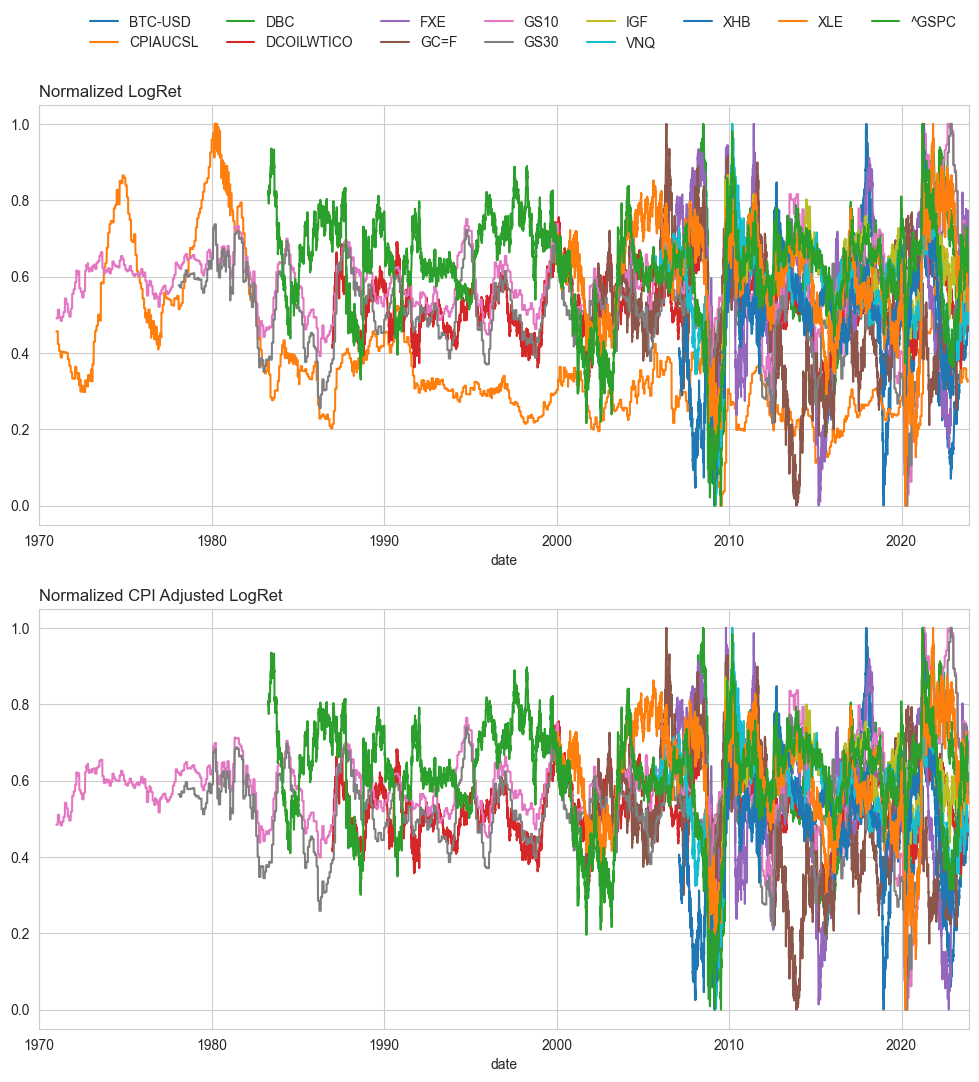

In [8]:
df_yearly_rets_norm = (df_yearly_rets - df_yearly_rets.min()) / (
    df_yearly_rets.max() - df_yearly_rets.min()
)
df_yearly_rets_inflation_adjusted_norm = (
    df_yearly_rets_inflation_adjusted - df_yearly_rets_inflation_adjusted.min()
) / (
    df_yearly_rets_inflation_adjusted.max()
    - df_yearly_rets_inflation_adjusted.min()
)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
for ax, data, title in zip(
    axes,
    [df_yearly_rets_norm, df_yearly_rets_inflation_adjusted_norm],
    ["Normalized LogRet", "Normalized CPI Adjusted LogRet"],
):
    data.plot(ax=ax, legend=False)
    ax.set_title(title, loc="left")
axes[0].legend(
    loc="lower right", ncol=8, frameon=False, bbox_to_anchor=(1, 1.1)
)

### 2.1.1. Graphical Analysis of Asset Returns and Inflation

#### Normalized Logarithmic Returns

The first graph plots the normalized logarithmic returns (LogRet) for various asset classes over time. Normalization adjusts the scale of returns, making it possible to compare the performance across different assets despite their varying magnitudes of returns.

**Interpretation**: This graph allows us to observe the volatility and trend patterns across different assets. Peaks and troughs correspond to periods of high and low returns, respectively, and give us insight into the stability and risk associated with each asset class.

#### Normalized CPI Adjusted Logarithmic Returns

The second graph shows the normalized logarithmic returns adjusted for the Consumer Price Index (CPI), representing the inflation-adjusted returns (CPI Adjusted LogRet).

**Interpretation**: By adjusting the returns for CPI, we can analyze the real returns of assets, accounting for the effect of inflation. This helps understand which assets have indeed gained value after adjusting for the cost of living.

## 2.2. KDE Analysis

The KDE plots enable us to assess which assets may serve as inflation hedges visually. We can also infer the assets' volatility concerning inflation by the spread of scatter points. By examining the steepness of the regression lines, we gain insight into the strength of the relationship between returns and inflation for each asset class.

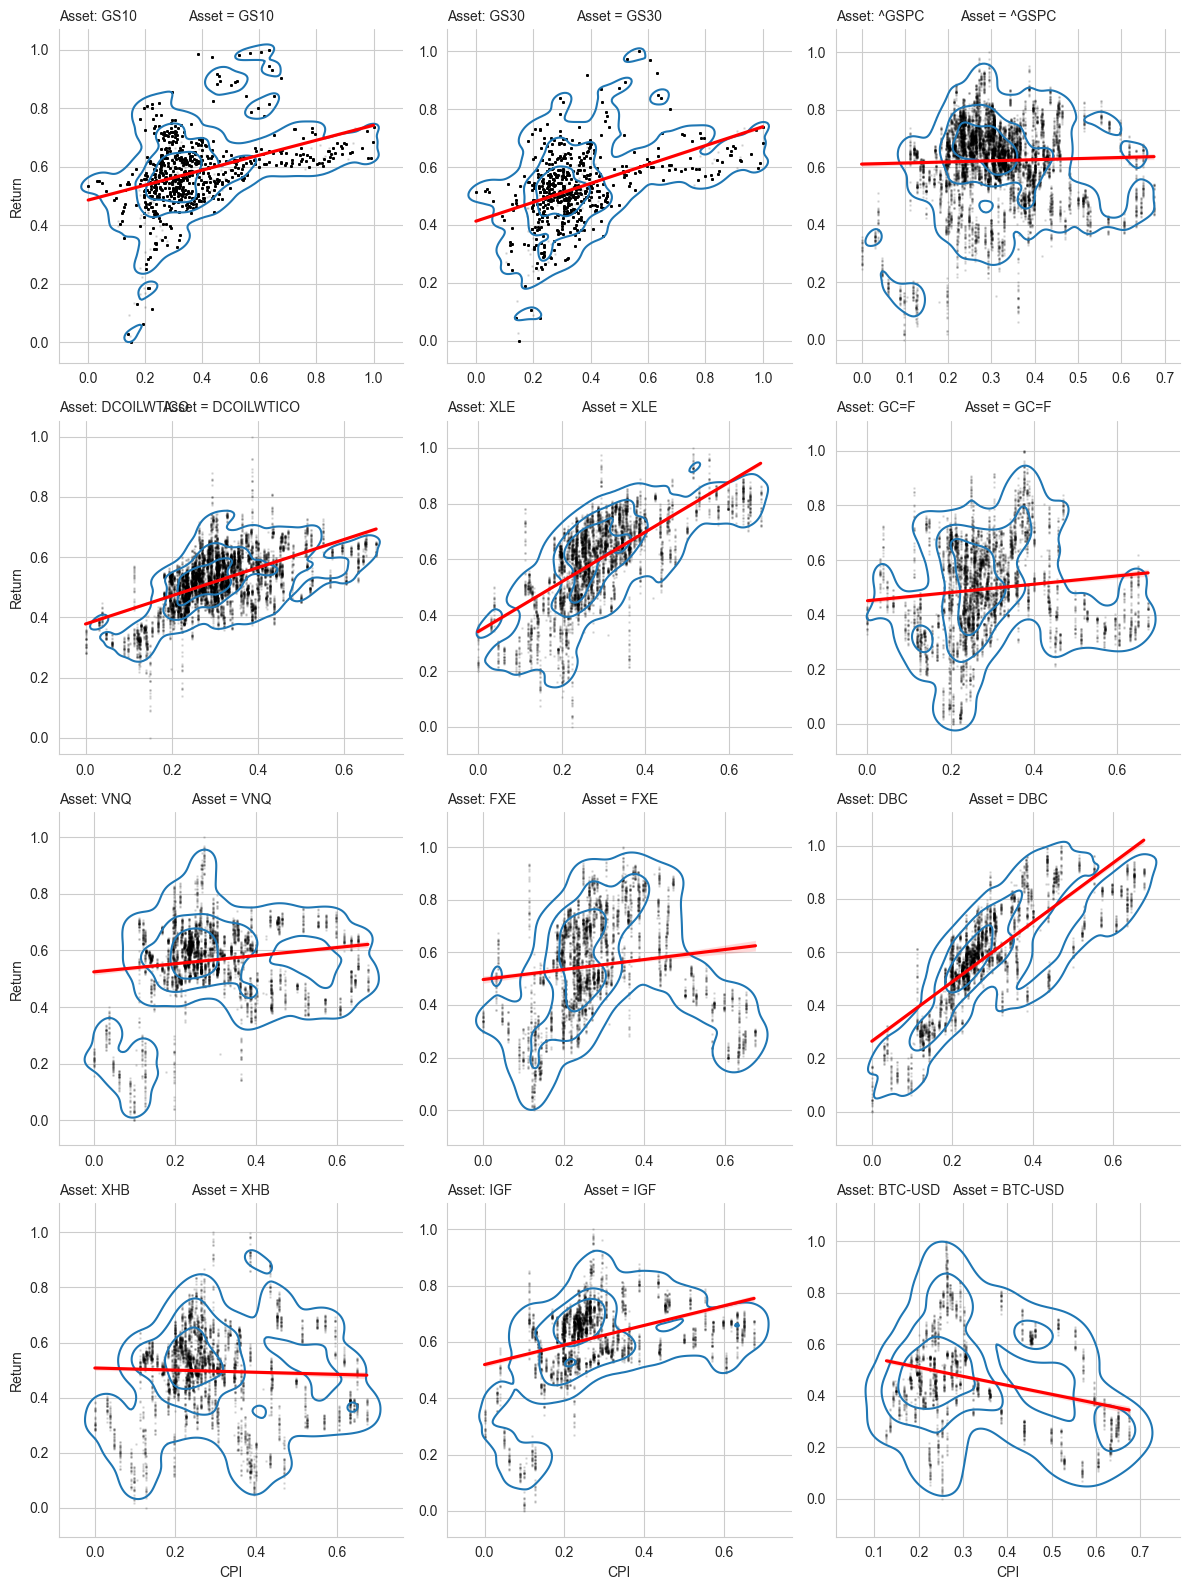

In [9]:
data_stck = (
    df_yearly_rets_norm.set_index("CPIAUCSL")
    .stack()
    .reset_index()
    .rename(columns={"ticker": "Asset", 0: "Return"})
    .dropna()
)
data_stck = data_stck[~data_stck["CPIAUCSL"].isna()].reset_index(drop=True)

# Define the number of columns for the grid
col_wrap = 3  # This can be adjusted as per your preference

# Create a FacetGrid
g = sns.FacetGrid(
    data_stck,
    col="Asset",
    col_wrap=col_wrap,
    height=4,
    sharex=False,
    sharey=False,
)

# Add the KDE plots and regression plots to each facet of the grid
g.map_dataframe(sns.kdeplot, x="CPIAUCSL", y="Return", levels=4)
g.map_dataframe(
    sns.regplot,
    x="CPIAUCSL",
    y="Return",
    scatter_kws={"s": 1, "color": "k", "alpha": 0.1},
    line_kws={"color": "r"},
)

# Set the titles and labels for each facet
g.set_titles("Asset: {col_name}", loc="left")
g.set_axis_labels("CPI", "Return")

#### KDE Analysis of Asset Returns vs. Inflation

The FacetGrid above displays the relationship between the **Consumer Price Index (CPI)** and returns for various asset classes. Each plot combines a scatter plot with a **Kernel Density Estimate (KDE)** and a regression line:

- *Scatter Plot*: Each point represents the CPI value against the return for the asset at a specific time period.
- *KDE Contour*: The contours indicate the density of points, with denser areas representing a higher concentration of data points.
- *Regression Line*: The red line in each plot shows the trend between CPI and returns, indicating whether there is a positive, negative, or no clear correlation.

**Interpretations**:
- Positive Correlation: If the red regression line has a positive slope, it suggests that as CPI (inflation) increases, the returns on the asset also tend to increase, which may indicate inflation sensitivity or hedging characteristics.

- Negative Correlation: A negative slope would suggest that the asset's returns decrease as CPI increases, indicating a negative impact of inflation on the asset.

- No Clear Correlation: If the regression line is flat or the scatter points are widely dispersed, it may imply a weak or no clear correlation between the CPI and the asset's returns.

## 2.3. Correlation matrix analysis

To further dive into correlation understanding, we investigate the structure of correlation matrix

The correlation matrix heatmap visualizes the strength and direction of the linear relationship between pairs of assets. Each cell in the matrix represents the correlation coefficient between the asset classes corresponding to that cell's row and column.

### 2.3.1. Understanding the Correlation Coefficient:

Values close to 1 indicate a strong positive correlation; as one asset's return increases, the other's return also tends to increase.

Values close to -1 indicate a robust negative correlation; as one asset's return increases, the other's return tends to decrease.

Values around 0 suggest no linear correlation between the assets.

### 2.3.2. Insights from the Heatmap

- **Color Intensity**: Darker shades of blue indicate stronger positive correlations, while darker shades of red indicate stronger negative correlations.
- **Annotated Values**: The heatmap includes numerical values, providing precise correlation coefficients for quick reference.
- **Diagonal Cells**: The diagonal, where the assets intersect with themselves, always shows a correlation of 1, which is perfectly positive as an asset is always perfectly correlated with itself.
- **Highlighted CPI Row/Column**: The row and column for the Consumer Price Index (CPI) are highlighted, often to emphasize the correlation of all assets with inflation.

### 2.3.3. Interpretation of Specific Assets:

- High Positive Correlation: Two assets that show a high positive correlation move in tandem and may not provide diversification benefits in a portfolio.
- High Negative Correlation: Assets with high negative correlations can be used for hedging, as they tend to move in opposite directions.
- Low or Zero Correlation: These assets offer diversification benefits because their returns do not show any significant linear relationship.

**Observations, based on the Highlighted CPI**:
Assets that have a strong positive correlation with CPI may be considered as potential hedges against inflation.
Assets negatively correlated with CPI may lose value during inflationary periods.

Text(0.5, 1.0, 'Correlation Matrix')

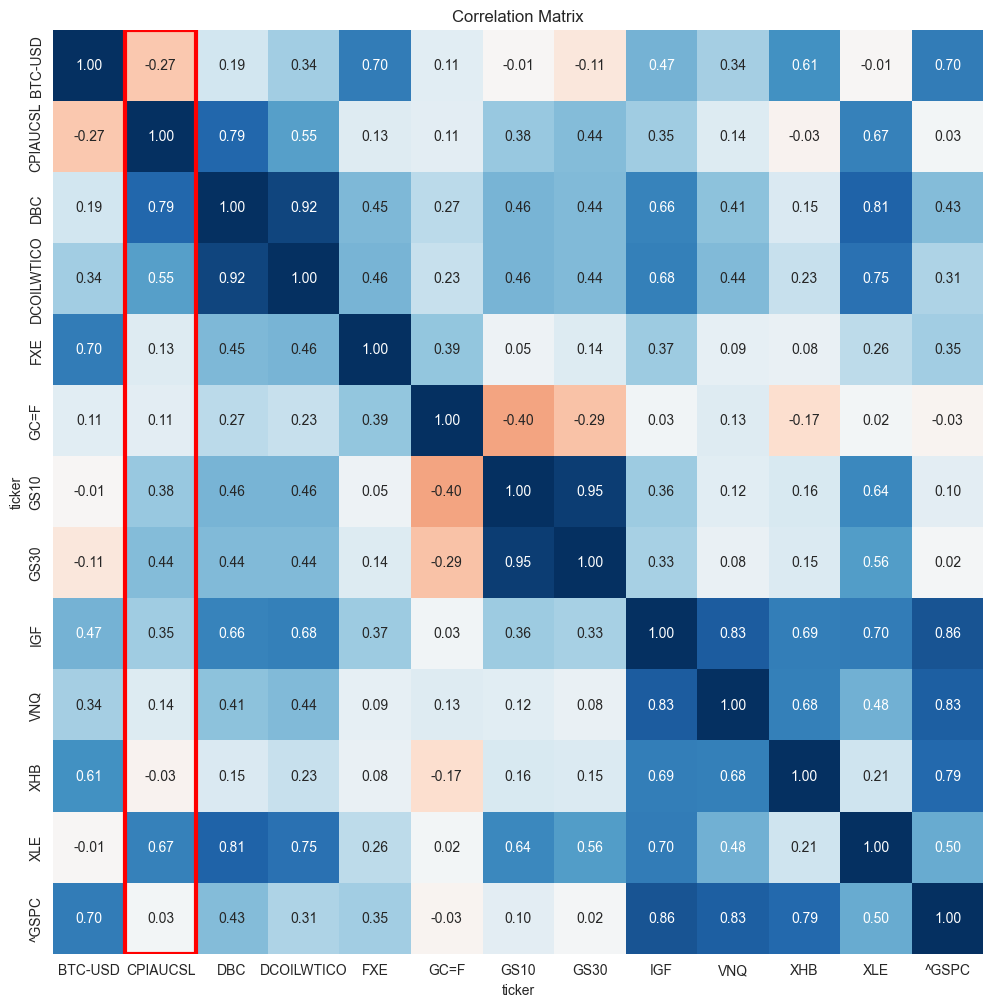

In [11]:
# Correlation matrix
corr = df_yearly_rets_norm.corr()
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    corr,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    fmt=".2f",
    cbar=False,
    cmap="RdBu",
)

n = len(corr)
idx_cpi = corr.index.get_loc("CPIAUCSL")
ax.add_patch(
    plt.Rectangle((idx_cpi, 0), 1, n, fill=False, edgecolor="red", lw=3)
)
ax.set_title("Correlation Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

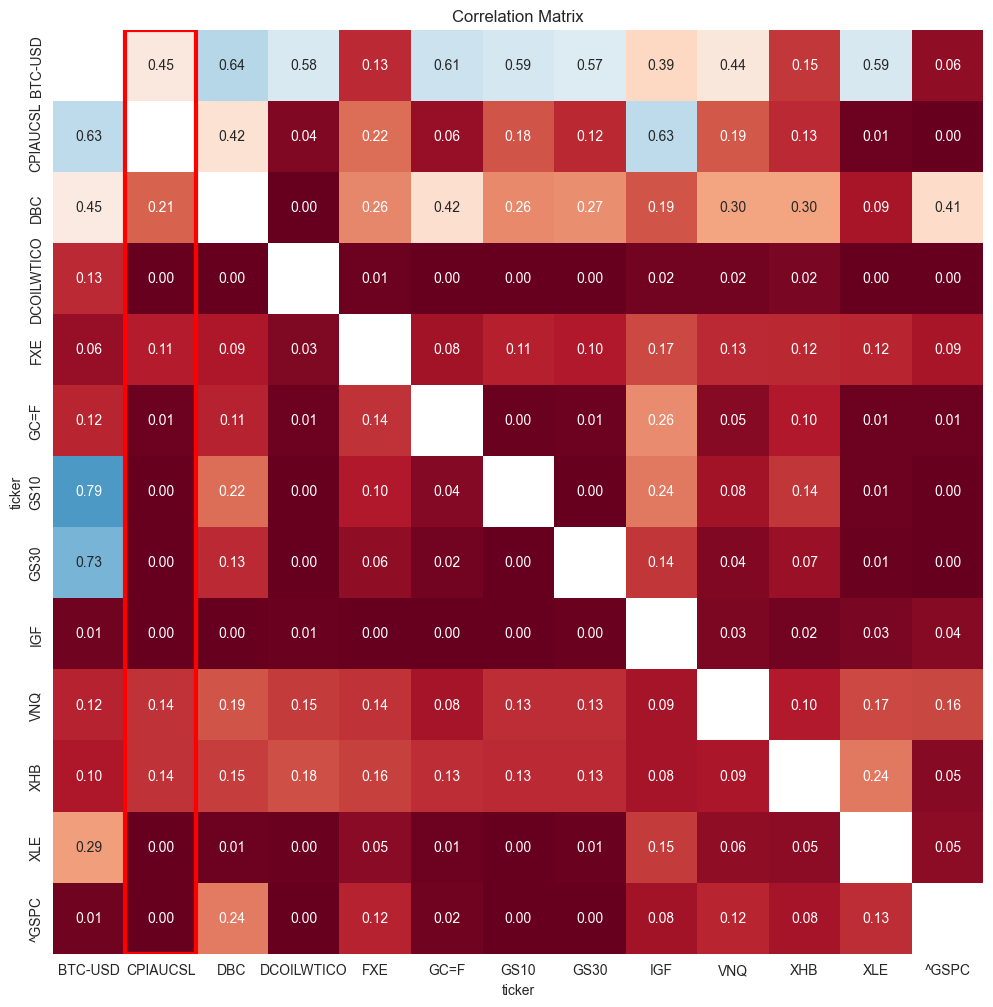

In [13]:
# Compute pairwise cointegration for all assets

import statsmodels.tsa.stattools as ts

coint = pd.DataFrame(
    index=df_yearly_rets_norm.columns, columns=df_yearly_rets_norm.columns
)
for i in df_yearly_rets_norm.columns:
    for j in df_yearly_rets_norm.columns:
        if i != j:
            data_dna = df_yearly_rets_norm[[i, j]].dropna()
            coint.loc[i, j] = ts.coint(data_dna[i], data_dna[j])[1]
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    coint.astype(float),
    annot=True,
    vmin=0,
    vmax=1,
    center=0.5,
    fmt=".2f",
    cbar=False,
    cmap="RdBu",
)
ax.set_title("Cointegration Matrix")
ax.grid(False)

n = len(corr)
idx_cpi = corr.index.get_loc("CPIAUCSL")
ax.add_patch(
    plt.Rectangle((idx_cpi, 0), 1, n, fill=False, edgecolor="red", lw=3)
)
ax.set_title("Correlation Matrix")

# 3. Portfolio Optimization

We will use the following assets:
- GS10: 10-Year Treasury Constant Maturity Rate
- GS30: 30-Year Treasury Constant Maturity Rate
- DCOILWTICO: Crude Oil Prices: West Texas Intermediate (WTI)
- XLE: Energy Stocks (Energy Select Sector SPDR Fund)
- GC=F: Gold Futures
- FXE: Foreign Currencies (CurrencyShares Euro Trust)
- DBC: Commodities (Invesco DB Commodity Index Tracking Fund)
- BTC-USD: Cryptocurrencies (Bitcoin)

We will create a portfolio that is optimized for inflation protection.
For this reason, we will use the daily returns adjusted for inflation as the input for the optimization.
We will use the Sharpe Ratio as the metric to optimize. We try to maximize the Sharpe Ratio while keeping the volatility low.
Some bounds for the weights are also set; we don't want to have too much weight in a single asset, so we set the minimum and maximum weight to 5% and 30%, respectively, to ensure some diversification.

We also create an equally weighted portfolio; this will be our benchmark.

In [14]:
from scipy.optimize import minimize


df_rets_portfolio = df_daily_rets_inflation_adjusted[
    ["GS10", "GS30", "DCOILWTICO", "XLE", "GC=F", "FXE", "DBC", "BTC-USD"]
]
n_assets = len(df_rets_portfolio.columns)

mean_returns = df_rets_portfolio.mean()
cov_matrix = df_rets_portfolio.cov()


# Function to calculate portfolio performance metrics
def portfolio_performance(weights, mean_returns, covariance):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(
        252
    )
    sharpe_ratio = returns / std
    return std, returns, sharpe_ratio


# Function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, mean_returns, covariance):
    return -portfolio_performance(weights, mean_returns, covariance)[2]


# Constraints (weights sum to 1)
constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}

# Boundaries for weights
bounds = tuple((0.05, 0.3) for asset in range(n_assets))

# Initial guess (equal distribution)
initial_guess = n_assets * [
    1.0 / n_assets,
]

# Optimization
opt_results = minimize(
    negative_sharpe,
    initial_guess,
    args=(mean_returns, cov_matrix),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)

# Optimal weights
optimal_weights = opt_results.x

# Optimal performance metrics
(
    portfolio_std_dev,
    portfolio_return,
    portfolio_sharpe_ratio,
) = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

# Print the results
print("Optimal weights:", optimal_weights)
print("Expected annual return:", portfolio_return)
print("Annual volatility / std dev:", portfolio_std_dev)
print("Sharpe Ratio:", portfolio_sharpe_ratio)

Optimal weights: [0.05 0.05 0.05 0.15 0.3  0.05 0.05 0.3 ]
Expected annual return: 0.10298933267022582
Annual volatility / std dev: 0.19894108894601698
Sharpe Ratio: 0.5176875889031258


## 3.1. Portfolio Optimisation graphical assessment

The graph below compares the performance of three different investment strategies over time:

**Optimized portfolio CPI Adjusted**: This line represents a portfolio where the assets have been weighted according to an optimization algorithm, which maximized the Sharpe ratio, and the returns have been adjusted for inflation using the Consumer Price Index (CPI). The NAV (Net Asset Value) of this portfolio suggests how the value of an initial investment would have changed over time after accounting for inflation.

**RAW Optimized portfolio**: This line illustrates the performance of the optimized portfolio without adjusting for inflation. It provides a sense of how the portfolio's nominal value has grown over time without considering the purchasing power of the returns.

**Equal Weighted portfolio CPI Adjusted**: This line shows a portfolio where each asset is given equal weight, and the returns are also adjusted for inflation. This serves as a baseline comparison to assess the benefits of optimization against a simple equal allocation strategy.

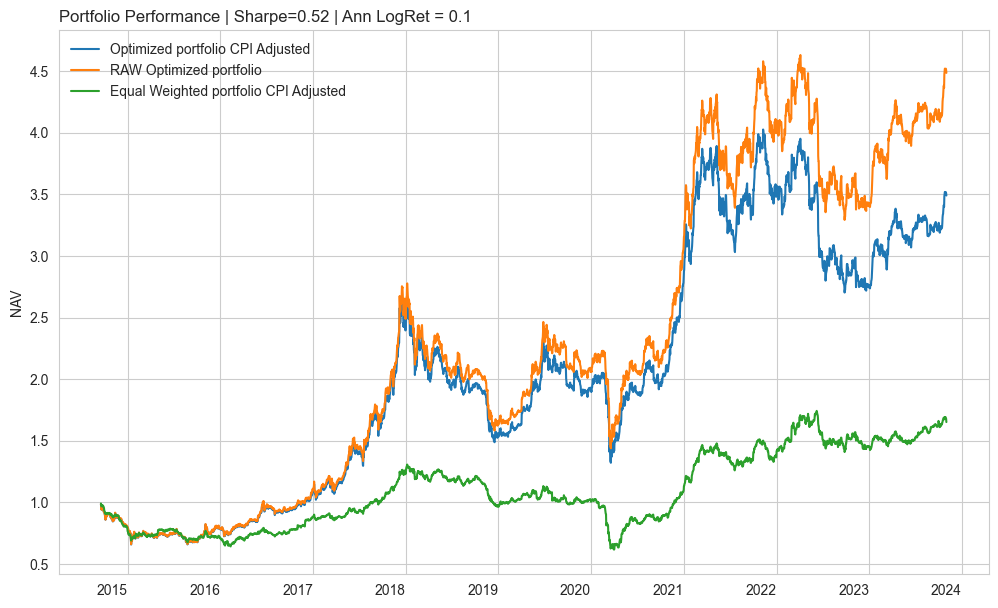

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
np.exp(
    (df_rets_portfolio * optimal_weights).dropna().sum(axis=1)
).cumprod().plot(label="Optimized portfolio CPI Adjusted")

np.exp(
    ((df_rets_portfolio.add(srs_cpi_dailylized, axis=0)) * optimal_weights)
    .dropna()
    .sum(axis=1)
).cumprod().plot(label="RAW Optimized portfolio")

np.exp(
    (df_rets_portfolio * ([1 / n_assets] * n_assets)).dropna().sum(axis=1)
).cumprod().plot(label="Equal Weighted portfolio CPI Adjusted")


ax.legend(loc="upper left", frameon=False)
ax.set_title(
    f"Portfolio Performance | Sharpe={round(portfolio_sharpe_ratio,2)} | Ann LogRet = {round(portfolio_return,2)}",
    loc="left",
)
ax.set_ylabel("NAV")
ax.set_xlabel("")
ax.tick_params(axis="x", rotation=0)

### 3.1.1. Key Observations

The CPI-adj. opt. port. shows a generally higher NAV over time compared to the CPI-adj. equal-weighted portfolio, indicating that the opt. port. has outperformed the equally weighted portfolio on an inflation-adjusted basis.

The RAW opt. port. demonstrates higher nominal returns than the inflation-adjusted version, which is expected since it does not account for the erosion of purchasing power due to inflation. The divergence between the CPI-adj. opt. port. and the raw opt. port. reflects the impact of inflation on investment returns.

The performance of the CPI-adj. equal-weighted portfolio suggests that while more straightforward strategies can be effective, they may not capitalize on potential efficiencies gained through optimization.

## 3.2. Efficient Frontier analysis

The graph below represents the Efficient Frontier in portfolio optimization, along with a scatter plot of randomly generated portfolios regarding their risk (volatility) and return characteristics.

**Axes:**

- The x-axis (Annualized Volatility) measures the portfolio returns' standard deviation, representing the portfolio's risk.
- The y-axis (Annualized Returns) measures the portfolio's expected return.

This type of analysis is crucial for portfolio management as it helps understand which portfolios are expected to yield the most efficient returns for a given risk appetite.

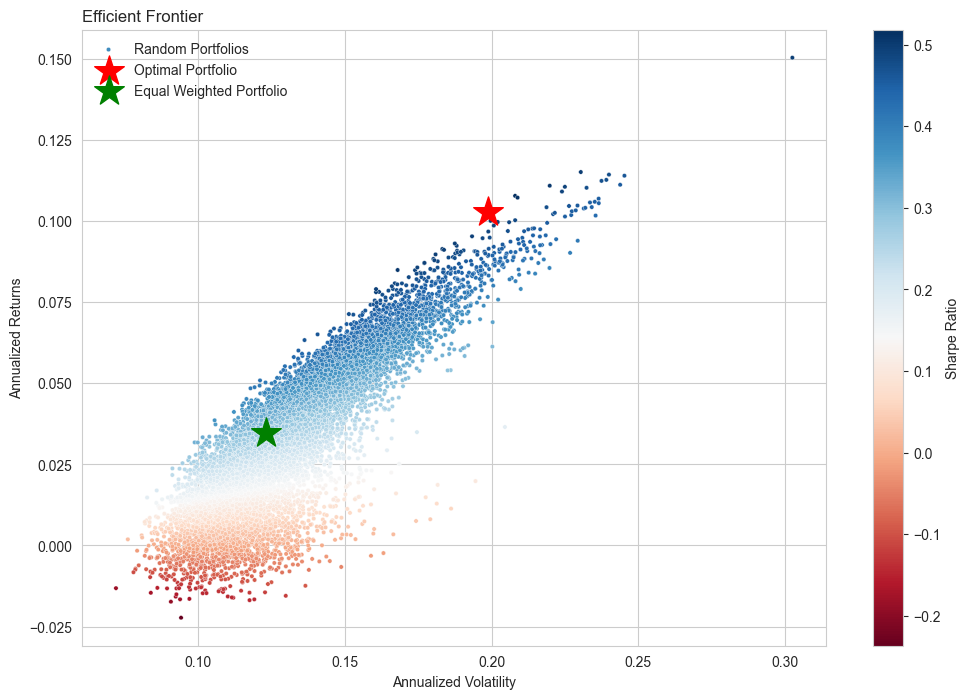

In [16]:
means = []
stds = []
sharpe = []
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(10000):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    means.append(np.sum(mean_returns * weights) * 252)
    stds.append(
        np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    )
    sharpe.append(means[-1] / stds[-1])

norm = plt.Normalize(min(sharpe), max(sharpe))
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
sns.scatterplot(
    x=stds,
    y=means,
    c=sharpe,
    ax=ax,
    label="Random Portfolios",
    cmap="RdBu",
    marker="o",
    s=10,
)

# Set plot titles and labels
ax.set_title("Efficient Frontier", loc="left")
ax.set_xlabel("Annualized Volatility")
ax.set_ylabel("Annualized Returns")
ax.tick_params(axis="x", rotation=0)
plt.colorbar(sm, ax=ax, orientation="vertical", label="Sharpe Ratio")

ax.scatter(
    portfolio_std_dev,
    portfolio_return,
    marker="*",
    color="r",
    s=500,
    label="Optimal Portfolio",
)

ax.scatter(
    np.sqrt(
        np.dot(
            ([1 / n_assets] * n_assets),
            np.dot(cov_matrix, ([1 / n_assets] * n_assets)),
        )
    )
    * np.sqrt(252),
    np.sum(mean_returns * ([1 / n_assets] * n_assets)) * 252,
    marker="*",
    color="g",
    s=500,
    label="Equal Weighted Portfolio",
)

ax.legend(loc="upper left", frameon=False)

### 3.2.1. Efficient Frontier Graph Explanation:

**Random Portfolios (dots)**: Each dot on the plot represents a portfolio with a random allocation to different assets. The colour of the dots represents the Sharpe ratio, with cooler colours (blue) indicating a higher Sharpe ratio and warmer colours (red) indicating a lower Sharpe ratio. The Sharpe ratio measures risk-adjusted return, and a higher Sharpe ratio is generally better.

**Optimal Portfolio (red star)**: This star represents the portfolio with the maximum Sharpe ratio, also known as the Tangency Portfolio. This portfolio is considered optimal because it offers the highest expected return per unit of risk.

**Equal Weighted Portfolio (green star)**: This star represents a simple portfolio where all assets are weighted equally. Its position relative to the other dots and the frontier gives an idea of its efficiency in terms of risk and return.

**Color Gradient (Sharpe Ratio)**: The colour bar on the right side of the graph shows the gradient of the Sharpe ratio. As we move up the colour scale from red to blue, the Sharpe ratio increases, indicating better risk-adjusted performance.

**Efficient Frontier (the curve)**: While not explicitly drawn in this plot, the Efficient Frontier is the envelope of the upper boundary of the cluster of points. It represents the set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return.

# 3.2.3. Key insights

1. Portfolios that lie on the upper edge of the cluster (the Efficient Frontier) are considered optimally balanced between risk and return.

2. Portfolios below the frontier are sub-optimal because they provide a lower return for the level of risk taken or a higher risk for the level of return expected.

3. The Optimal Portfolio is typically where the capital market line, representing the risk-return trade-off of the market, is tangent to the Efficient Frontier.

4. The Equal Weighted Portfolio's position indicates how a non-optimized, equally distributed investment across all assets would perform compared to optimized portfolios.